# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (1.9125286940102448, 0.3843259159161112)
1     (2.583056116736459, 0.2748504744759539)
2    (0.8887713232130969, 0.6412180799405858)
3    (0.19124849469721364, 0.908805437972515)
4     (0.149173271523009, 0.9281270615809826)
dtype: object

#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here
"The p-value is higher than 0.05, which implies that the data comes from nomal distributions,\
since the null hypothesis of the sample following a normal distribution cannot be discarded,\
which is expectable given that we have created such kind of distribution"

'The p-value is higher than 0.05, which implies that the data comes from nomal distributions,since the null hypothesis of the sample following a normal distribution cannot be discarded,which is expectable given that we have created such kind of distribution'

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

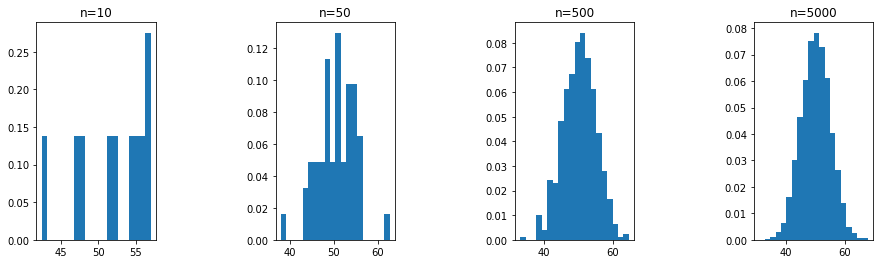

In [4]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Your comment and explanation here
"As the sample gets bigger, the plots show a more normally distributed shape. This is due \
to the Central Limit Theorem, which states that in a sufficiently large sample size, \
the mean of all samples from the same population will be approximately equal to the \
mean of the population"

'As the sample gets bigger, the plots show a more normally distributed shape. This is due to the Central Limit Theorem, which states that in a sufficiently large sample size, the mean of all samples from the same population will be approximately equal to the mean of the population'

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

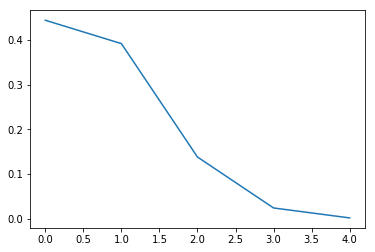

In [6]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [7]:
# Your comment here
"The probability of 0 people clicking the add is the higher. In fact \
the probability decreases with the increase of people. This is due to the little sample size.\
This little sample size leads to the maximum point being at 0.75 people. Since there is no\
possibility of being a 0.75 of a subject (the minimum of a person is 1 since we cannot take\ 
only a part of the person), there is no posibility of the values decreasing before the maximum"

SyntaxError: EOL while scanning string literal (<ipython-input-7-0b3c040c6d45>, line 5)

#### Now plot PMP with 50, 500, and 5000 visitors.

In [ ]:
# Your code here
n= [50,500,5000]
p =  0.15

for visitor in n:
    x = range(visitor)
    plt.figure()
    plt.plot(binom.pmf(x,visitor,p))
    plt.grid()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
"All graphs show the higher probability of n people clicking the add when n is a 0.15 of\
the total sample (7.5,75,750). This probability (the maximum probability), is lower as the \ 
sample gets higher, since the quantity of people having to click the add gets higher, which\
is more improbable to achieve"

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
"The Poisson distribution represents, given an average number of events occuring during a\
given period of time, the probability during a certain period of having k events; that is,\
the probability of having k events during a certain period knowing the average events per time"

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here
from scipy.stats import poisson

poisson.pmf(300,320)


#### What is the probability of getting 60 visits?

In [ ]:
# Your code here
poisson.pmf(60,320)

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)